In [13]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import torch
from torch.autograd import Variable
import numpy as np
import cv2

if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

from ssd import build_ssd

%matplotlib inline
from matplotlib import pyplot as plt
from data import VOCDetection, VOC_ROOT, VOCAnnotationTransform

In [14]:
net = build_ssd('test', 300, 21)  # initialize SSD
net.load_weights('../weights/ssd300_mAP_77.43_v2.pth')

Loading weights into state dict...
Finished!


In [15]:
from data import VOC_CLASSES as labels

def detect_on_image(image):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x = cv2.resize(image, (300, 300)).astype(np.float32)
    x -= (104.0, 117.0, 123.0)
    x = x.astype(np.float32)
    x = x[:, :, ::-1].copy()

    x = torch.from_numpy(x).permute(2, 0, 1)

    xx = Variable(x.unsqueeze(0))  # wrap tensor in Variable
    y = net(xx)


    plt.figure(figsize=(10, 10))
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    plt.imshow(rgb_image)  # plot the image for matplotlib
    currentAxis = plt.gca()

    detections = y.data

    # scale each detection back up to the image
    scale = torch.Tensor(rgb_image.shape[1::-1]).repeat(2)
    for i in range(detections.size(1)):
        j = 0
        while detections[0, i, j, 0] >= 0.5:
            score = detections[0, i, j, 0]
            label_name = labels[i - 1]
            display_txt = '%s: %.2f' % (label_name, score)
            pt = (detections[0, i, j, 1:] * scale).cpu().numpy()
            coords = (pt[0], pt[1]), pt[2] - pt[0] + 1, pt[3] - pt[1] + 1
            color = colors[i]
            currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
            currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor': color, 'alpha': 0.5})
            j += 1

In [17]:
import warnings
warnings.filterwarnings("ignore")

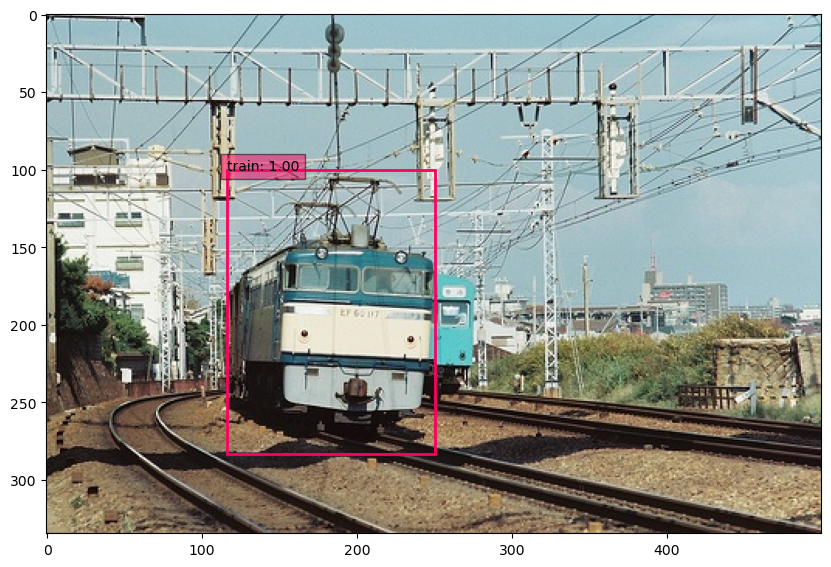

In [21]:
img_id = 777
testset = VOCDetection(VOC_ROOT, [('2007', 'val')], None, VOCAnnotationTransform())
image = testset.pull_image(img_id)

detect_on_image(image)

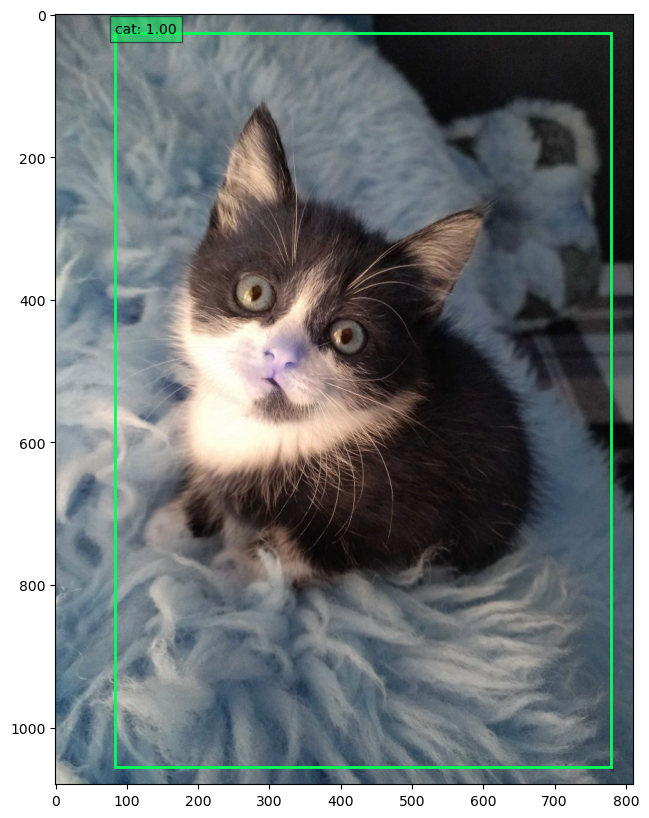

In [22]:
import imageio as iio

image = iio.imread("../images/1.jpg")
detect_on_image(image)

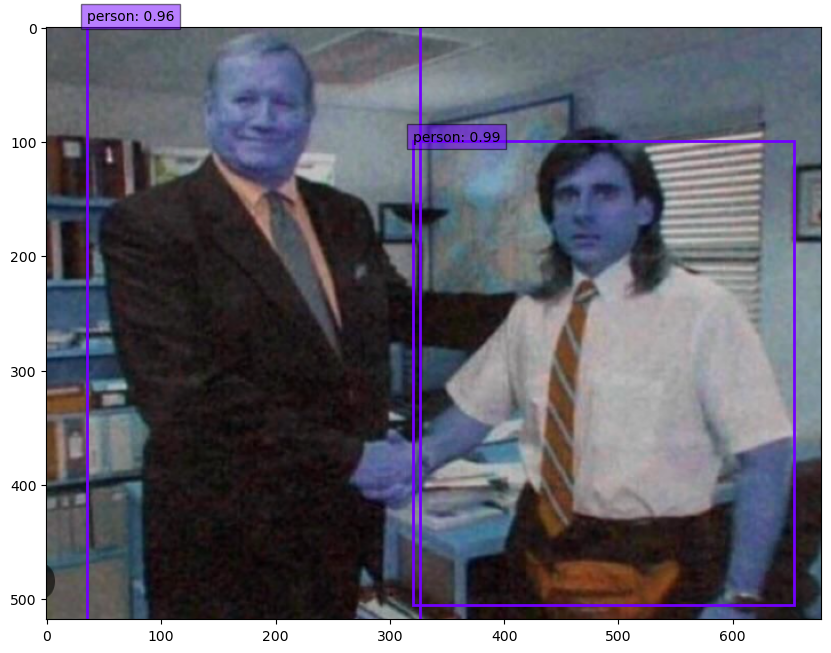

In [23]:
image = iio.imread("../images/2.png")
detect_on_image(image)

In [10]:
from data import VOC_CLASSES as labels

labels

('aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor')